In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('HR_data.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [28]:
left = df[df.left==1]
left.shape

(3571, 10)

In [29]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [44]:
numerical_df = df.drop(['Department', 'salary'], axis='columns')
numerical_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [47]:
grouped_df = numerical_df.groupby('left')
grouped_df.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

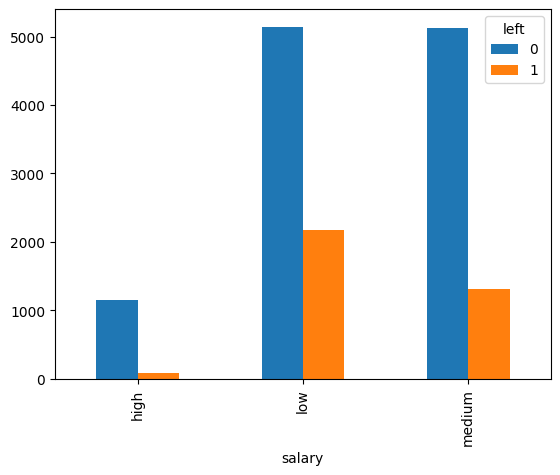

In [48]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

<Axes: xlabel='Department'>

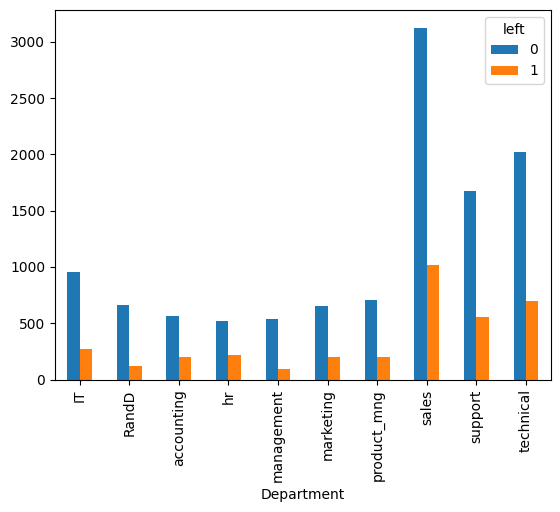

In [50]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

In [68]:
dummies=pd.get_dummies(df.salary, dtype=int, prefix='salary')
dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [73]:
new_df = pd.concat([df,dummies],axis='columns')
new_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


In [85]:
final_df = new_df.drop(['last_evaluation','number_project','time_spend_company','Work_accident','left','Department','salary','salary_medium'], axis='columns')
final_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [86]:
x=final_df
y=df[['left']]
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.80)

In [87]:
x_test.shape

(3000, 5)

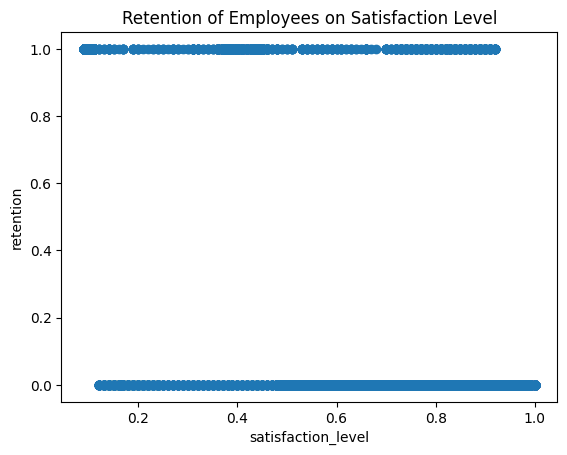

In [62]:
plt.title('Retention of Employees on Satisfaction Level')
plt.xlabel('satisfaction_level')
plt.ylabel('retention')
plt.scatter(df.satisfaction_level,df.left)
plt.show()

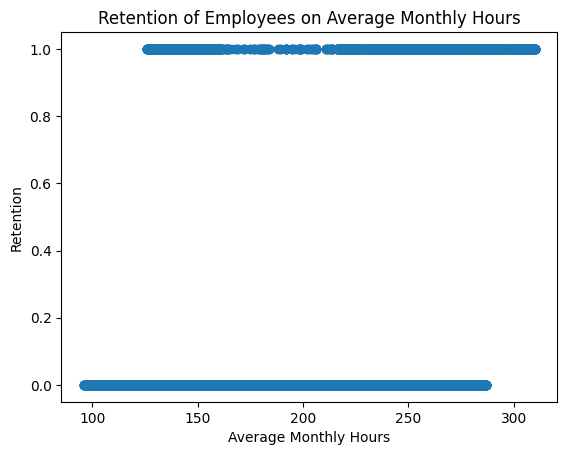

In [63]:
plt.title('Retention of Employees on Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Retention')
plt.scatter(df.average_montly_hours,df.left)
plt.show()

In [88]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [89]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0])

In [93]:
model.predict([[0.05,187,0,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [94]:
import pickle

In [95]:
with open('HR_model', 'wb') as f:
  pickle.dump(model,f)